# Links

A *colormap* is a palette constructed by sampling some *smooth, linear* function between two end colors. Colormaps are generally used for 2-D or 3-D plots, where the color serves as an extra \"dimension\". This is implemented in matplotlib with the [LinearSegmentedColormap](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.colors.LinearSegmentedColormap.html), and also with the special ProPlot [PerceptuallyUniformColormap](https://proplot.readthedocs.io/en/latest/api/proplot.styletools.PerceptuallyUniformColormap.html#proplot.styletools.PerceptuallyUniformColormap) class. Use this notebook to experiment with different colormaps on sample datasets.

The following online GUI tools can be used to generate perceptually uniform colormaps.

* [cmOcean](https://matplotlib.org/cmocean/)
* [SciVisColor](https://sciviscolor.org/home/colormaps/)
* [Fabio Crameri](http://www.fabiocrameri.ch/colourmaps.php)
* [Chroma.js](https://gka.github.io/palettes/)
* [Chroma.js fork](http://tristen.ca/hcl-picker/#/hlc/12/0.99/C6F67D/0B2026)
* [HCLWizard](http://hclwizard.org:64230/hclwizard/)

You can also programatically generate perceptually uniform colormaps with [ProPlot](https://proplot.readthedocs.io/).

# Colorblind friendly
Something we didn't get into -- you generally want your colormaps to be colorblind friendly. A great tool for testing this is the [Color Oracle](https://colororacle.org) app. In the future, you may also be able to use ProPlot to test the colorblind-friendliness of colormaps.

# Online colormaps 
The below cell uses ProPlot to [register colormaps](https://proplot.readthedocs.io/en/latest/colors.html#adding-online-color-colormaps) online. Try plotting some sample data with them!

In [1]:
import os
import proplot as plot


# Paste a list of hex strings in the below string
name = 'tmp'
hexdata = """
#000000 #ffffff
"""
with open(os.path.expanduser(f'~/.proplot/cmaps/{name}.hex'), 'w') as f:
    f.write(hexdata)
    
# Paste a 3-column table of RGB data in the below string
name = 'tmp'
rgbdata = """
0, 0, 0
1, 1, 1
"""
with open(os.path.expanduser(f'~/.proplot/cmaps/{name}.rgb'), 'w') as f:
    f.write(rgbdata)
    
# Paste a 4-column table of "colormap coordintes" and RGB data in the below string
# This time the first column is a colormap coordinate
name = 'tmp'
xrgbdata = """
0, 0, 0, 0
1, 1, 1, 1
"""
with open(os.path.expanduser(f'~/.proplot/cmaps/{name}.xrgb'), 'w') as f:
    f.write(xrgbdata)
    
# Paste XML data in the below string
# Some websites only save colormap data as XML strings
name = 'tmp'
xmldata = """
<ColorMap>
  <Point x="0" r="0" g="0" b="0"/>
  <Point x="1" r="1" g="1" b="1"/>
</ColorMap>
"""
with open(os.path.expanduser(f'~/.proplot/cmaps/{name}.xml'), 'w') as f:
    f.write(xmldata)
    
# Load new colormaps into ProPlot
plot.register_cmaps()

/Users/ribr5703/anaconda3/envs/climate-science-colormapping/lib/python3.7/site-packages/proplot/styletools.py:281: ProPlotWarning: Found extra files Helvetica-BoldOblique.ttf, Helvetica.ttf, Helvetica-Oblique.ttf, Helvetica-Light.ttf, Helvetica-Bold.ttf in the ~/.proplot folder. Files must be placed in the .proplot/cmaps, .proplot/cycles, or .proplot/fonts subfolders.


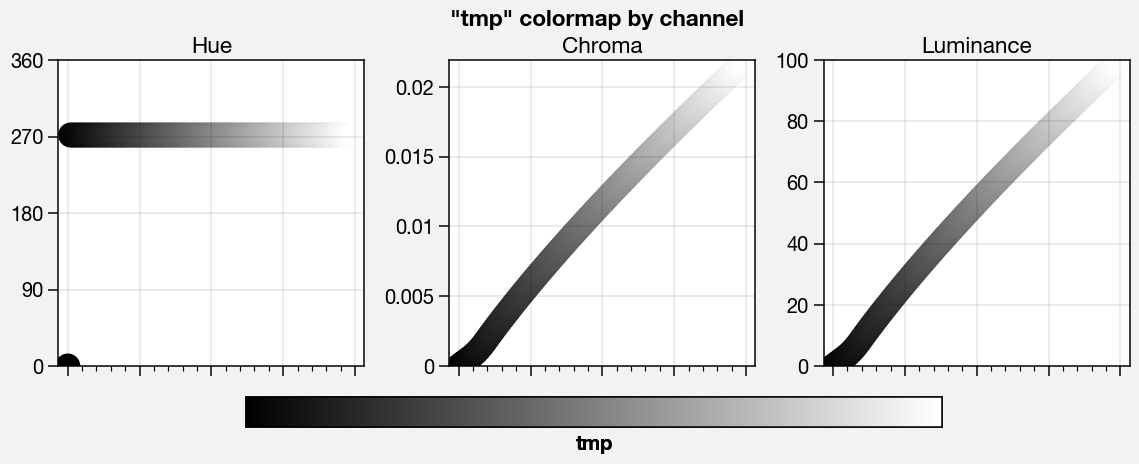

In [54]:
# Breakdown of your colormap
f = plot.show_channels('tmp', rgb=False, scalings=False)

# Try out your colormaps

We've added a few observational datasets to the repository to try out your colormaps. Just replace the `cmap=...` with the name of your colormap from above.

## Sequential Colormaps

These examples anticipate a sequential colormap. They are mainly comprised of climatologies.

### Model Data

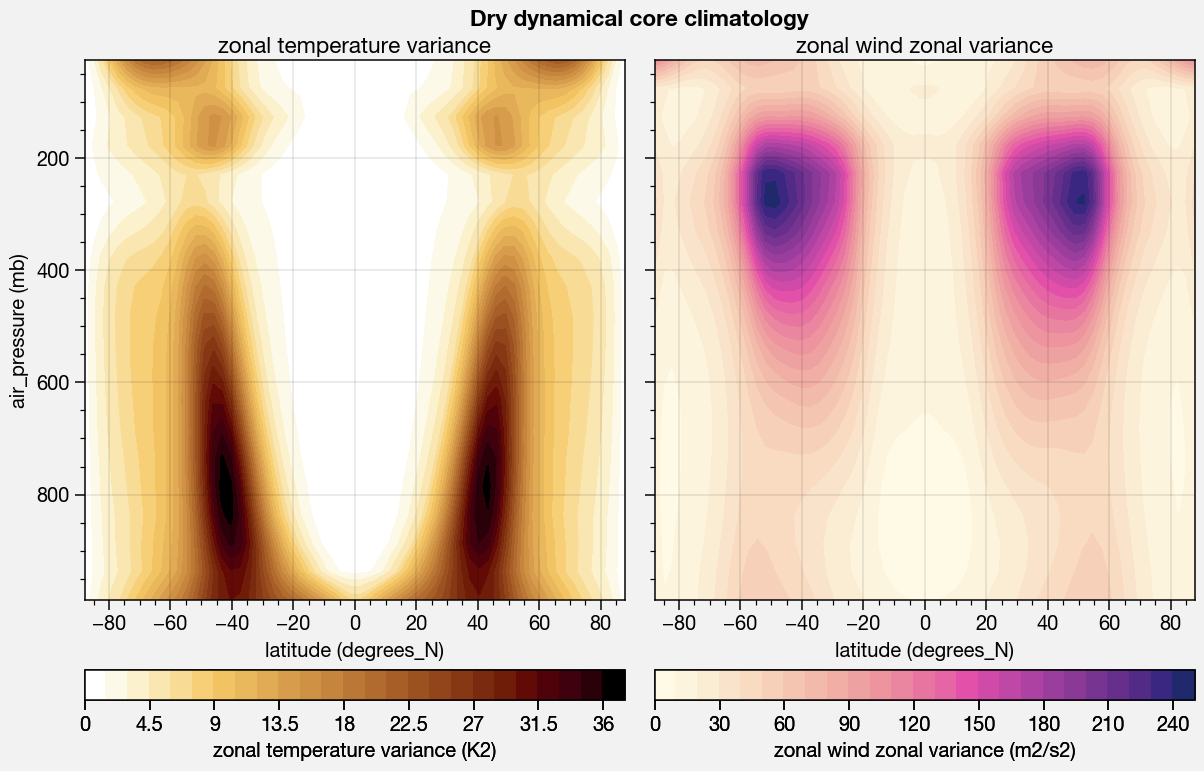

In [50]:
import proplot as plot
import xarray as xr

# Your colormaps here!
cmap1 = 'stellar'
cmap2 = 'sunset'

# Plot model data
data = xr.open_dataset('../data/HS94.climate.d0500-d3500.nc',decode_times=False)
data = xr.open_dataset('../data/HS94.climate.d0500-d3500.nc',decode_times=False)
tvar = data['tvar'].isel(lon=0, time=0)
uvar = data['uvar'].isel(lon=0, time=0)

f, axs = plot.subplots(ncols=2, axwidth=3, span=False)

N = 30 # number of levels
axs[0].contourf(tvar, N=N, cmap=cmap1, colorbar='b')
axs[1].contourf(uvar, N=N, cmap=cmap2, colorbar='b')

axs.format(suptitle='Dry dynamical core climatology', yreverse=True)

### Oceanography Data (Sea Surface Temperatures)

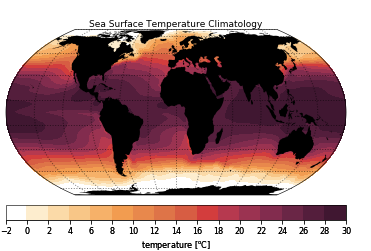

In [4]:
import proplot as plot
import xarray as xr
import proplot as plot
plot.rc.small = 12
plot.rc.large = 12

SST = xr.open_dataarray('../data/SST.HadNOAA.1970-2010.1deg.nc')

f, ax = plot.subplots(proj='eqearth', axwidth='12cm')

# Your colormap here!
cmap = 'Fire'
p = ax.contourf(SST.lon, SST.lat, SST, levels=plot.arange(-2, 30, 2), cmap=cmap)

f.colorbar(p, loc='b', ticks=plot.arange(-2, 30, 2),
           label='temperature [$^{o}$C]')

ax.format(land=True, title='Sea Surface Temperature Climatology')

# Uncomment this to save your figure. Feel free to rename it.
# f.savefig('../figures/SST.climatology.png')

### Atmospheric Data

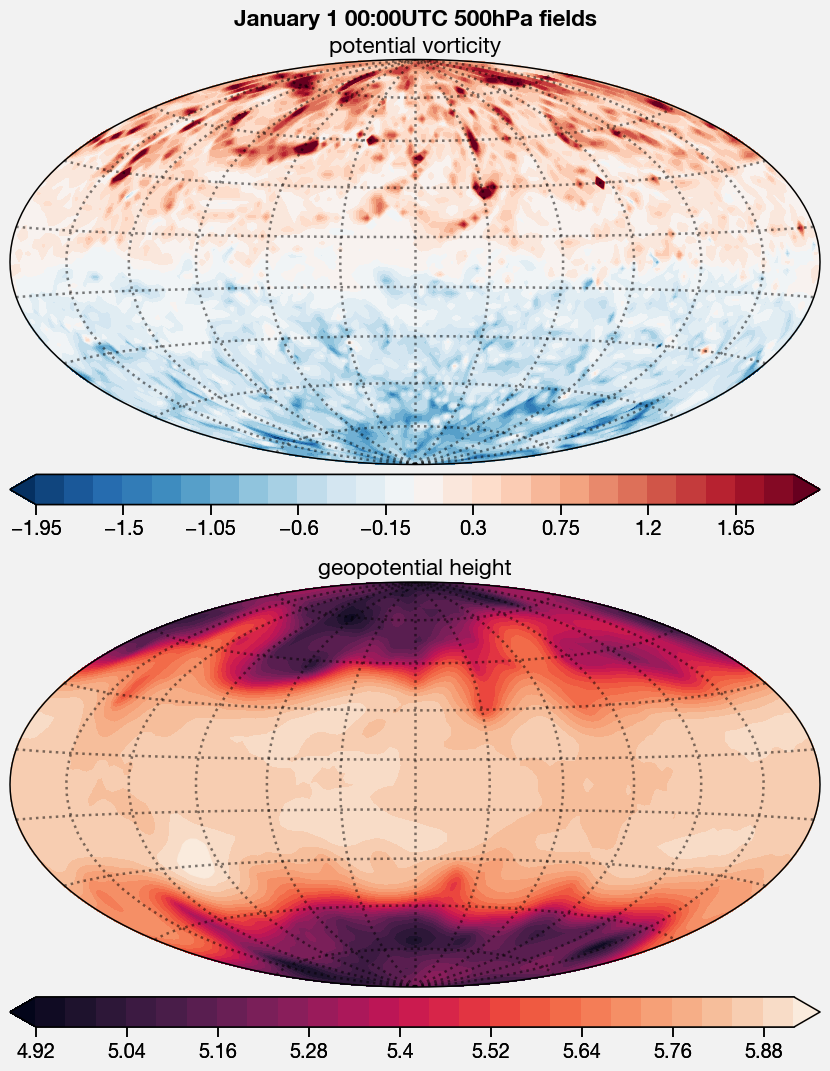

In [61]:
import proplot as plot
import xarray as xr

sel = {'time':0, 'longitude':slice(None,None,10), 'latitude':slice(None,None,10)}
data = xr.open_dataset('../data/ERA5.500mb.2018-01-01.nc')
vor = data['pv'].isel(**sel)*1e6
vor.attrs.update({'units':'PVU', 'long_name':'potential vorticity'})
geo = data['z'].isel(**sel)/1e3/9.81
geo.attrs.update({'units':'m', 'long_name':'geopotential height'})

# Your colormap here!
cmap1 = 'BuRd'
cmap2 = 'Rocket'

N = 30
f, axs = plot.subplots(nrows=2, proj='hammer', axwidth=4.5)
axs[0].contourf(vor, vmin=-2, vmax=2, cmap=cmap1, N=N, colorbar='b', extend='both', globe=True)
axs[1].contourf(geo, cmap=cmap2, N=N, colorbar='b', extend='both', globe=True)
axs.format(suptitle='January 1 00:00UTC 500hPa fields')

### Sea Ice Data

In [5]:
import xarray as xr

# Plot sea ice data
ice_data = []
for hemisphere, season in zip(['NH', 'NH', 'SH', 'SH'], 
                              ['fm', 'on', 'fm', 'on']):
    filepath = f'../data/ICESat_gridded_mean_thickness_{hemisphere}_{season}.interp0.5x0.5.nc'
    sea_ice = xr.open_dataset(filepath)
    ice_data.append(sea_ice)
ice_data = xr.concat(ice_data, 'location')
ice_data['location'] = ['NH_fm', 'NH_on', 'SH_fm', 'SH_on']

# Coarsen to a 1x1 degree grid.
lat = ice_data['t_lat'].coarsen({'t_lat': 2, 't_lon': 2}).mean()
lon = ice_data['t_lon'].coarsen({'t_lat': 2, 't_lon': 2}).mean()
ice_thk = ice_data['HI'].reset_coords(drop=True).coarsen({'t_lat': 2, 't_lon': 2}).mean()

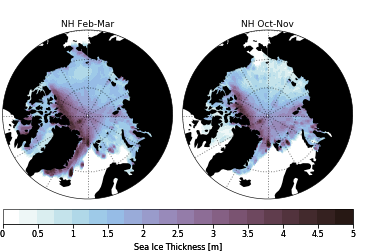

In [6]:
import proplot as plot
plot.rc.small = 12
plot.rc.large = 12

f, axs = plot.subplots(ncols=2, proj='npstere', axwidth='6cm')

# Your colormap here!
cmap = 'Glacial'
for i, label in zip([0, 1], ['NH Feb-Mar', 'NH Oct-Nov']):
    p = axs[i].contourf(lon, lat, ice_thk.isel(location=i), cmap=cmap,
                    levels=plot.arange(0, 5, 0.25))
    axs[i].format(land=True, boundinglat=60, latlines=10, title=label)

f.colorbar(p, loc='b', label='Sea Ice Thickness [m]',
           ticks=plot.arange(0, 5, 0.5))

# Uncomment this to save your figure. Feel free to rename it.
# f.savefig('../figures/NP.sea.ice.png')

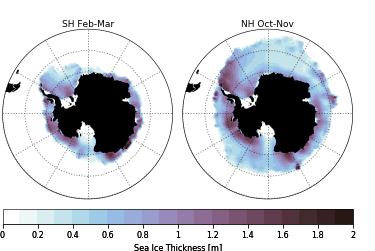

In [7]:
import proplot as plot
plot.rc.small = 12
plot.rc.large = 12

f, axs = plot.subplots(ncols=2, proj='spstere', axwidth='6cm')

# Your colormap here!
cmap = 'Glacial'
for i, label in zip([0, 1], ['SH Feb-Mar', 'NH Oct-Nov']):
    p = axs[i].contourf(lon, lat, ice_thk.isel(location=i+2), cmap=cmap,
                    levels=plot.arange(0, 2, 0.1))
    axs[i].format(land=True, boundinglat=-50, latlines=10, title=label)

f.colorbar(p, loc='b', label='Sea Ice Thickness [m]',
           ticks=plot.arange(0, 2, 0.2))

# Uncomment this to save your figure. Feel free to rename it.
# f.savefig('../figures/SH.sea.ice.png')

## Diverging Colormaps

These examples anticipate a diverging colormap. They are mainly comprised of anomalies. 

### Precipitation Change in SSP585

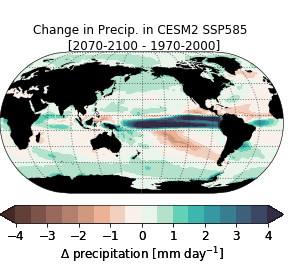

In [35]:
import xarray as xr
import proplot as plot
plot.rc.small = 12
plot.rc.large = 12

delta_rain = xr.open_dataarray('../data/CESM2_delta_precip_2070-2100_1970-2000.nc')

f, ax = plot.subplots(proj='eck3', proj_kw={'central_longitude': 180}, axwidth='10cm')

p = ax.contourf(delta_rain.lon, delta_rain.lat, delta_rain, 
            levels=plot.arange(-4, 4, 0.5), cmap='Moisture',
            extend='both')

f.colorbar(p, loc='b', label='$\Delta$ precipitation [mm day$^{-1}$]',
           ticks=plot.arange(-4, 4, 1))

ax.format(land=True, 
          title='Change in Precip. in CESM2 SSP585 \n [2070-2100 - 1970-2000]')

# Uncomment this to save your figure. Feel free to rename it.
# f.savefig('../figures/delta_precip.png')